# Message Passing

## Setup

In [1]:
%matplotlib inline
import numpy as np
from tramp.algos import DisplayLatexMessagePassing
from IPython.display import display_latex
from tramp.experiments import BayesOptimalScenario
import logging
logger = logging.getLogger()

## Perceptron

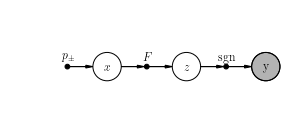

In [2]:
from tramp.models import glm_generative
perceptron = glm_generative(
    N=100, alpha=0.5, ensemble_type="gaussian", 
    prior_type="binary", output_type="sgn", 
    prior_p_pos=0.5
)
scenario = BayesOptimalScenario(perceptron)
scenario.setup()
scenario.student.plot()

In [3]:
latex = DisplayLatexMessagePassing(scenario.student).run()
print("FORWARD")
for msg in latex["forward"]:
    display_latex(msg, raw=True)
print("BACKWARD")
for msg in latex["backward"]:
    display_latex(msg, raw=True)

FORWARD


BACKWARD


## Committee

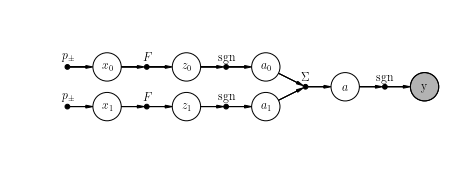

In [4]:
from tramp.models import sgn_committee
committee = sgn_committee(
    K=2, N=100, alpha=0.5, ensemble_type="gaussian", 
    p_pos=[0.5, 0.5], noise_var=0
)
scenario = BayesOptimalScenario(committee, x_ids=["x_0","x_1"])
scenario.setup()
scenario.student.plot()

In [5]:
latex = DisplayLatexMessagePassing(committee).run()
print("FORWARD")
for msg in latex["forward"]:
    display_latex(msg, raw=True)
print("BACKWARD")
for msg in latex["backward"]:
    display_latex(msg, raw=True)

FORWARD


BACKWARD


## TV classification

In [6]:
# fake data
A = np.ones((3, 4*5))
y = np.ones(3)
x_shape = (4, 5)

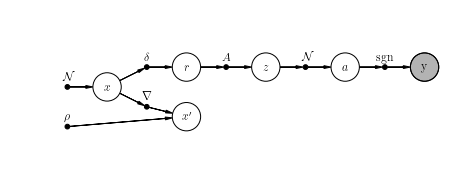

In [7]:
from tramp.models import sparse_gradient_classification
sparse_grad = sparse_gradient_classification(
    A=A, x_shape=x_shape, y=y, 
    grad_rho=0.3, noise_var=0.1, prior_var=1
)
sparse_grad.plot()

In [8]:
latex = DisplayLatexMessagePassing(sparse_grad).run()
print("FORWARD")
for msg in latex["forward"]:
    display_latex(msg, raw=True)
print("BACKWARD")
for msg in latex["backward"]:
    display_latex(msg, raw=True)

FORWARD


BACKWARD
